# Test an home made version of curve fit (with no errors)

In [6]:
%matplotlib inline
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import matplotlib.pyplot as plt
from utils.regressor import regressor
from utils.trick_output import lin_sin_lin, trick_params

## Simple test

Result: [2.0193393  0.80754862 1.23333756]
kmax iteration reached


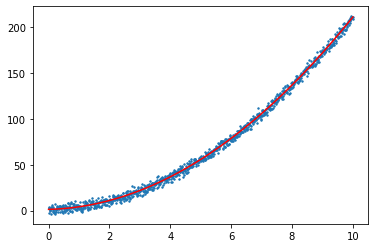

In [4]:
def para(x, a, b, c):
    """A parabola""" # <---- the model
    return a * x * x + b * x + c

def para_noisy(x, a, b, c):
    """A noisy parabola""" # <---- the data
    rng = np.random.default_rng()
    return para(x, a, b, c) + rng.normal(0, 3, len(x))

x = np.linspace(0, 10, 1000) # domain
a = 2 ; b = 1; c = 1 # pre-choosen parameters

# Put the parameters in a list
params = [a, b, c]

# Initialize target
y = para_noisy(x, *params)

# Initialize the regressor
my_reg = regressor()
my_reg.fit(x, y, para, params) # Fit the data
best_params = my_reg.best_params # get the best parameters

# Watch the results
print('Result:' , best_params)
plt.plot(x, para(x, *best_params), c = 'r')
plt.scatter(x, y, s = 2)
print(my_reg.reason)

## It will works on ours data?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


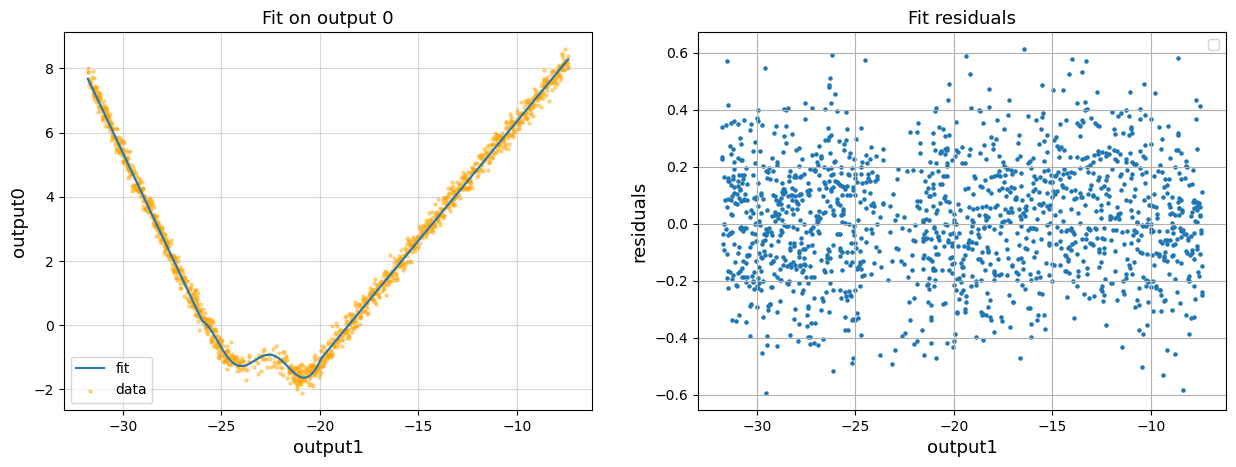

kmax iteration reached
7.967460816129053


In [19]:
raw_data=np.loadtxt(data_dir + "TR.csv",delimiter=",")[:,1:]
np.random.shuffle(raw_data)

x = np.copy(raw_data[:,11]) # easy output
y = np.copy(raw_data[:,10]) # hard output

xx = np.linspace(np.min(x), np.max(x), 1000)

# SEE FILE utils.trick_output that contain the parameters!
params = trick_params() # Convergence guarantee

my_reg = regressor()
my_reg.fit(x, y, lin_sin_lin, params)
popt_sin = my_reg.best_params


plt.figure(dpi=100,figsize=(15,5))
plt.subplot(121)
plt.plot(xx,lin_sin_lin(xx,*popt_sin),label="fit")
plt.scatter(x, y, s = 5, label ='data', alpha = 0.4, c='orange')
plt.title("Fit on output 0",fontsize=13)
plt.xlabel("output1",fontsize=13)
plt.ylabel("output0",fontsize=13)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

plt.subplot(122)
plt.title("Fit residuals",fontsize=13)
plt.ylabel("residuals",fontsize=13)
plt.xlabel("output1",fontsize=13)
plt.scatter(x, y-lin_sin_lin(x,*popt_sin), s = 5)
plt.legend(fontsize=10)
plt.grid()

plt.show()
print(my_reg.reason)
print(my_reg.rmse)